In [2]:
import cv2, PIL
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [3]:
cv2.__version__

'4.1.0'

In [4]:
from cv2 import aruco

In [5]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)

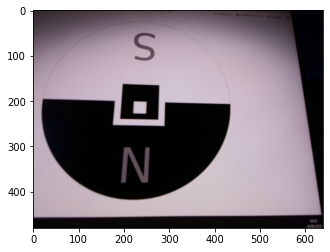

In [13]:
frame = cv2.imread("_data/south3.jpg")
plt.figure()
plt.imshow(frame)
plt.show()

In [14]:
# post processing
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

[[17]]
[array([[[275., 241.],
        [192., 239.],
        [198., 163.],
        [278., 166.]]], dtype=float32)]


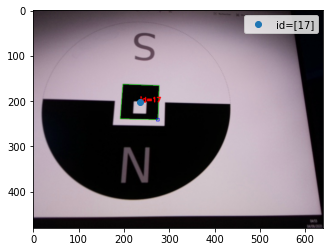

In [15]:
#results
print(ids)
print(corners)

plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

In [16]:
# pour avoir cameraMatrix, distCoeffs, il faut caliberer la caméra
cameraMatrix = cv2.UMat(np.array(
                [[501.00981086, 0, 322.60954865],
                 [0, 502.06765583, 240.3226073],
                 [0, 0., 1.]]))
distCoeffs = cv2.UMat(np.array([1.54271483e-01, -8.59578664e-02, 1.13392638e-03, 4.86769054e-04]))
rvecs, tvecs, _objPoints = cv2.aruco.estimatePoseSingleMarkers(corners, 0.05, cameraMatrix, distCoeffs)

#Converts a rotation matrix to a rotation vector or vice versa.
R = cv2.Rodrigues(rvecs)[0]

#help(cv2.Rodrigues)
#print(rvecs.get())
print(R.get())

[[-0.99854981 -0.01018422  0.05286359]
 [-0.02450878  0.96028242 -0.27795141]
 [-0.04793326 -0.27884395 -0.95913943]]


In [17]:
# Checks if a matrix is a valid rotation matrix.
def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6

# Calculates rotation matrix to euler angles
# The result is the same as MATLAB except the order
# of the euler angles ( x and z are swapped ).
def rotationMatrixToEulerAngles(R) :

    assert(isRotationMatrix(R))
    
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    
    singular = sy < 1e-6

    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0

    return np.array([x, y, z])

In [18]:
# convert a rotation matrix to Euler angles
e_m = rotationMatrixToEulerAngles(R.get())
print(e_m)

e_m_deg = []
# convert to rad -> deg
for i in e_m:
    e_m_deg.append((i * 180) / math.pi)
    
print(e_m_deg)

[-2.85866839  0.04795164 -3.11705321]
[-163.78963397349577, 2.7474264633445724, -178.59399339638912]


In [19]:
# check y coordinate
if(e_m_deg[1] < 0): print("Nord") 
else: print("Sud")

Sud
